In [1]:
import sys
import os

sys.path.append(os.path.abspath('../'))

import pandas as pd

from src.utils import (
    plot_headline_length_distribution,
    plot_articles_per_publisher,
    plot_publication_trends,
    plot_sentiment_distribution
)

df = pd.read_csv('D:/Kifiya AI/financial-news-analysis/data/raw_analyst_ratings.csv')
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


## Initial Data Inspection

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [3]:
df.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [4]:
df.describe(include='all')

,Unnamed: 0,headline,url,publisher,date,stock
count,1.407328e+06,1407328,1407328,1407328,1407328,1407328
unique,NaN,845770,883429,1034,39957,6204
top,NaN,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,NaN,5449,1704,228373,1766,3333
mean,7.072454e+05,NaN,NaN,NaN,NaN,NaN
std,4.081009e+05,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,3.538128e+05,NaN,NaN,NaN,NaN,NaN
50%,7.072395e+05,NaN,NaN,NaN,NaN,NaN
75%,1.060710e+06,NaN,NaN,NaN,NaN,NaN


## Descriptive Statistics

In [5]:
#calculate and analyze the lengths of the headline
df['headline_length'] = df['headline'].apply(len)

headline_stats = df['headline_length'].describe()
print(headline_stats)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [6]:
#Article Count by Publisher
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


In [9]:
df['date'] = pd.to_datetime(df['date'], utc=True)

#Analyze the trends in publication dates
publication_trends = df['date'].value_counts().sort_index()
print(publication_trends)

date
2009-02-14 00:00:00+00:00    1
2009-04-27 00:00:00+00:00    2
2009-04-29 00:00:00+00:00    1
2009-05-22 00:00:00+00:00    1
2009-05-27 00:00:00+00:00    6
                            ..
2020-06-11 20:49:41+00:00    1
2020-06-11 20:51:33+00:00    1
2020-06-11 21:01:39+00:00    1
2020-06-11 21:11:20+00:00    1
2020-06-11 21:12:35+00:00    1
Name: count, Length: 39956, dtype: int64


## Data Visualization
# Visualize the distribution of headline lengths to see how they vary
# Visualize the number of articles contributed by each publisher

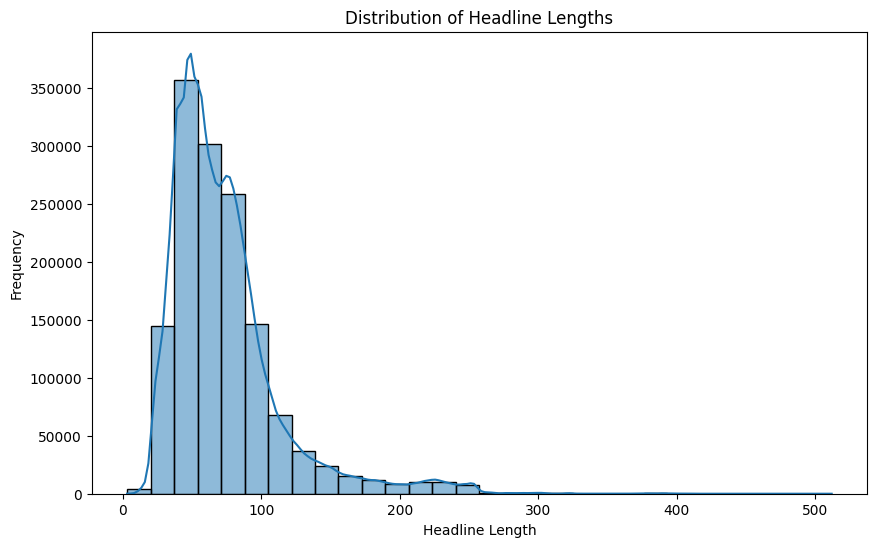

In [10]:
# Plot the headline length distribution
plot_headline_length_distribution(df)

d:\Kifiya AI\financial-news-analysis\src\utils.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts.values, y=publisher_counts.index, palette='viridis')


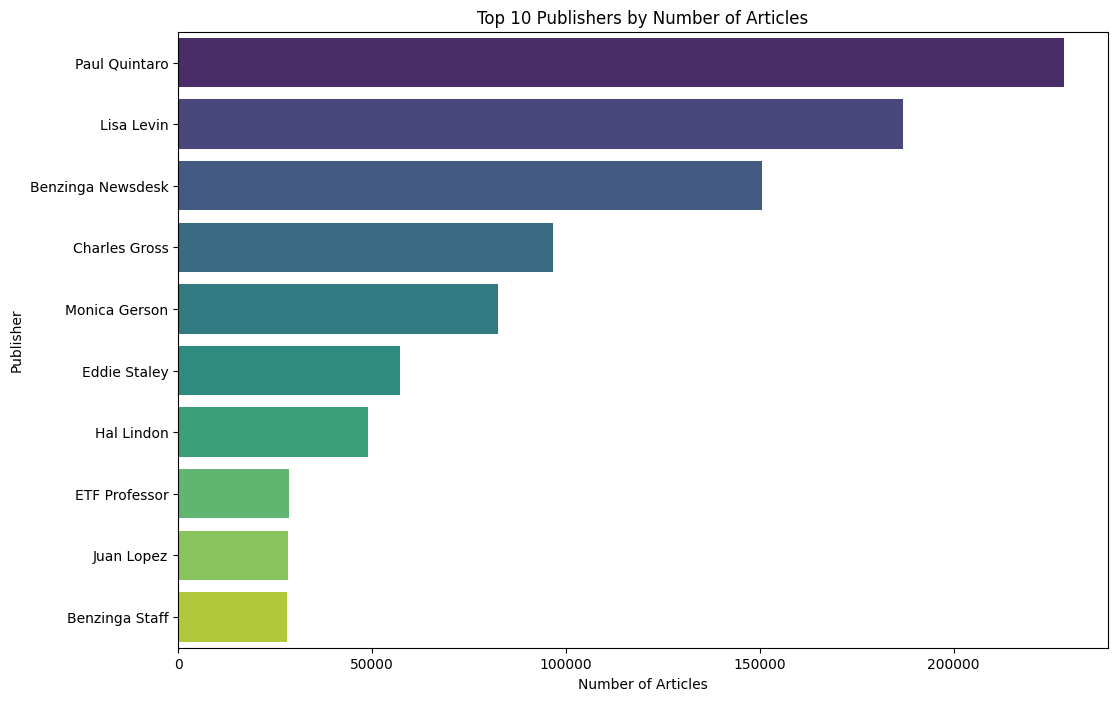

In [11]:
#plot publisher per article 
plot_articles_per_publisher(df,top_n=10)

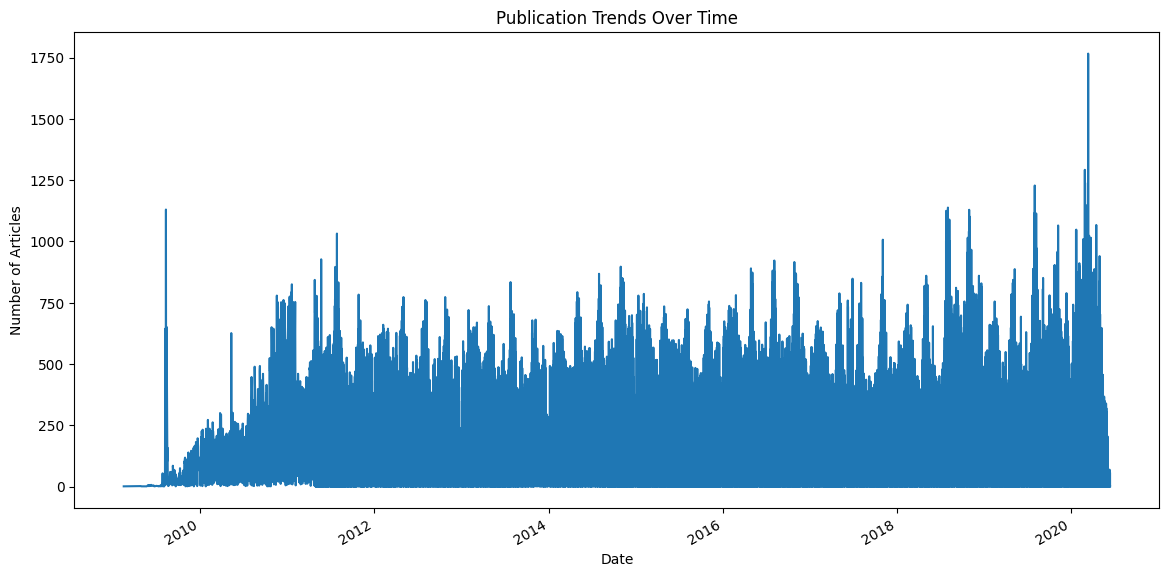

In [12]:
# Plot the publication trends over time
plot_publication_trends(publication_trends)

## Time Series Analysis

In [13]:
import matplotlib.pyplot as plt

df.set_index('date', inplace=True)

df = df.sort_index()

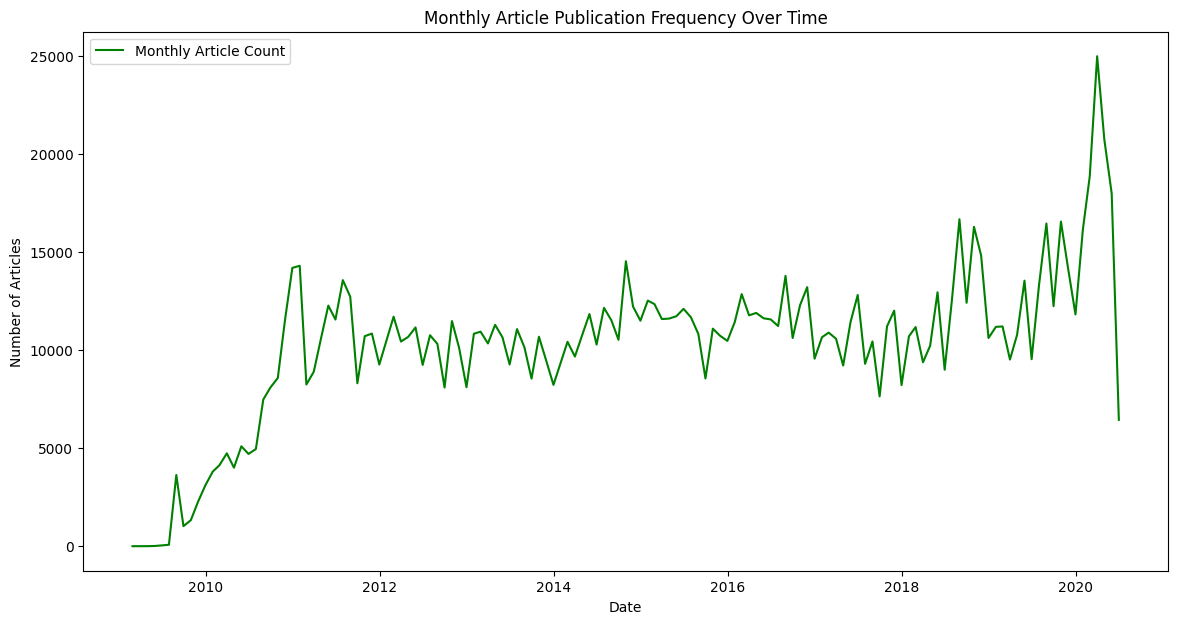

In [14]:
# Plot monthly counts
monthly_counts = df.resample('ME').size()
plt.figure(figsize=(14, 7))
plt.plot(monthly_counts, label='Monthly Article Count', color='green')
plt.title('Monthly Article Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

# Analyze Publishing Times

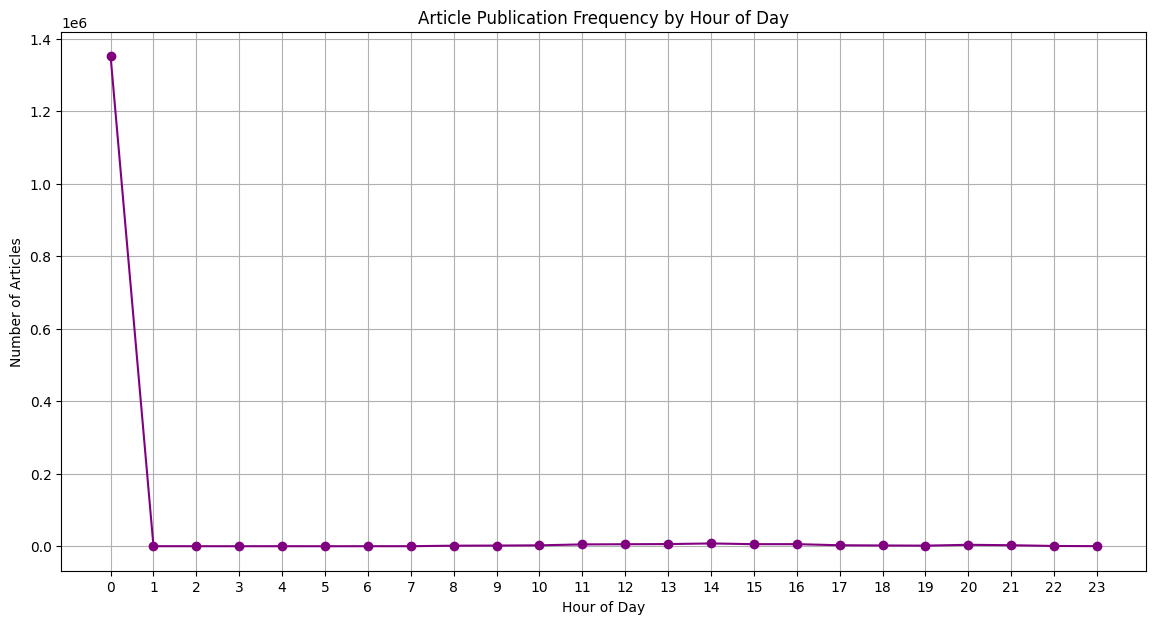

In [15]:
df['hour'] = df.index.hour

hourly_counts = df.groupby('hour').size()

plt.figure(figsize=(14, 7))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', linestyle='-', color='purple')
plt.title('Article Publication Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.xticks(range(0, 24)) 
plt.grid(True)
plt.show()

## Text Analysis

In [22]:
import nltk
import gensim
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric, remove_stopwords

In [17]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to d:\Kifiya
[nltk_data]     AI\financial-news-analysis\w1env\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Sentiment Analysis on Headlines

In [18]:
sia = SentimentIntensityAnalyzer()

## calculate sentiment scores for each headline and classify them into positive, neutral, or negative categories.

In [19]:
df['sentiment_score'] = df['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_label'] = df['sentiment_score'].apply(
    lambda score: 'Highly Positive' if score > 0.5 else (
        'Positive' if score > 0.05 else (
            'Neutral' if -0.05 <= score <= 0.05 else (
                'Negative' if score >= -0.5 else 'Highly Negative'
            ) )))


df[['headline', 'sentiment_score', 'sentiment_label']].head()

,headline,sentiment_score,sentiment_label
date,,,
2009-02-14 00:00:00+00:00,How Treasuries and ETFs Work,0.2263,Positive
2009-04-27 00:00:00+00:00,Update on the Luxury Sector: 2nd Quarter 2009,0.0000,Neutral
2009-04-27 00:00:00+00:00,Update on the Luxury Sector: 2nd Quarter 2009,0.0000,Neutral
2009-04-29 00:00:00+00:00,Going Against the Herd,0.0000,Neutral
2009-05-22 00:00:00+00:00,Charles Sizemore Radio Interview Saturday Morning,0.0000,Neutral


d:\Kifiya AI\financial-news-analysis\src\utils.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


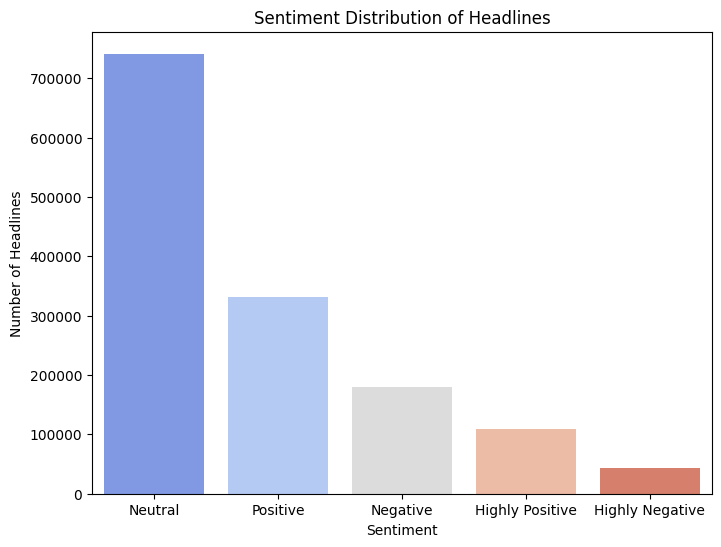

In [20]:
#Sentiment Distribution Visualization
plot_sentiment_distribution(df)

## Topic Modeling
# Preprocess Text Data by removing stopwords, punctuation, and numbers

In [23]:
filters = [lambda x: x.lower(), strip_punctuation, strip_numeric, remove_stopwords]

df['processed_headline'] = df['headline'].apply(lambda x: preprocess_string(x, filters))

df[['headline', 'processed_headline']].head()

,headline,processed_headline
date,,
2009-02-14 00:00:00+00:00,How Treasuries and ETFs Work,"[treasuries, etfs, work]"
2009-04-27 00:00:00+00:00,Update on the Luxury Sector: 2nd Quarter 2009,"[update, luxury, sector, nd, quarter]"
2009-04-27 00:00:00+00:00,Update on the Luxury Sector: 2nd Quarter 2009,"[update, luxury, sector, nd, quarter]"
2009-04-29 00:00:00+00:00,Going Against the Herd,"[going, herd]"
2009-05-22 00:00:00+00:00,Charles Sizemore Radio Interview Saturday Morning,"[charles, sizemore, radio, interview, saturday..."


# Create Dictionary and Corpus

In [24]:
dictionary = corpora.Dictionary(df['processed_headline'])

corpus = [dictionary.doc2bow(text) for text in df['processed_headline']]

# Train LDA Model to identify topics within the headlines

In [25]:
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Print the top words in each topic
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.070*"m" + 0.066*"q" + 0.047*"sales" + 0.045*"estimate" + 0.043*"eps"')
(1, '0.092*"s" + 0.057*"market" + 0.045*"lower" + 0.040*"amid" + 0.038*"hit"')
(2, '0.096*"price" + 0.090*"target" + 0.060*"maintains" + 0.038*"raises" + 0.035*"lowers"')
(3, '0.026*"shares" + 0.023*"coronavirus" + 0.022*"oil" + 0.017*"financial" + 0.014*"says"')
(4, '0.089*"trading" + 0.087*"stocks" + 0.071*"companies" + 0.070*"shares" + 0.054*"higher"')


In [26]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [27]:
vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization in a Jupyter notebook
pyLDAvis.display(vis)

# Assign the most relevant topic to each headline based on the LDA model's output

In [28]:
df['topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in corpus]

df[['headline', 'processed_headline', 'topic']].head()

,headline,processed_headline,topic
date,,,
2009-02-14 00:00:00+00:00,How Treasuries and ETFs Work,"[treasuries, etfs, work]",1
2009-04-27 00:00:00+00:00,Update on the Luxury Sector: 2nd Quarter 2009,"[update, luxury, sector, nd, quarter]",3
2009-04-27 00:00:00+00:00,Update on the Luxury Sector: 2nd Quarter 2009,"[update, luxury, sector, nd, quarter]",3
2009-04-29 00:00:00+00:00,Going Against the Herd,"[going, herd]",4
2009-05-22 00:00:00+00:00,Charles Sizemore Radio Interview Saturday Morning,"[charles, sizemore, radio, interview, saturday...",3


# Save the results, including sentiment scores and topic assignments, into a new CSV file for future analysis

In [29]:
df.to_csv('D:/Kifiya AI/financial-news-analysis/data/processed_data.csv', index=False)